# YZV311E Data Mining Project Model Development and Evaluation

## Name : Yusuf Faruk Güldemir
## Student ID : 150210302

## Name : Hasan Taha Bağcı
## Student ID : 150210338

## -------------------------------

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc


from utils.datapreprocess import *
from utils.model import *
from utils.plotdata import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/processed_data.csv')

In [3]:
df_train.isna().sum()

id                        0
code_gender               0
flag_own_car              0
flag_own_realty           0
cnt_children              0
amt_income_total          0
name_income_type          0
name_education_type       0
name_family_status        0
name_housing_type         0
age                       0
years_employed            0
flag_work_phone           0
flag_phone                0
flag_email                0
occupation_type           0
cnt_fam_members           0
months_balance            0
status                    0
employment_age_ratio      0
family_size_normalized    0
dtype: int64

## Train-Test Split

In [4]:
X = df_train.drop('status', axis=1)
y = df_train['status']

X_wo_month_bal = X.drop(['months_balance'], axis=1)

- #### Apply SMOTE (Synthetic Minority Oversampling Technique) to balance the data

In [5]:
smoted_X, smoted_y = smote(X, y)

Before SMOTE shape:  (777715, 20) (777715,)
After SMOTE shape:  (1532280, 20) (1532280,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(smoted_X, smoted_y, test_size=0.2, random_state=101)
X_train_wo_month_bal, X_test_wo_month_bal, y_train_wo_month_bal, y_test_wo_month_bal = train_test_split(X_wo_month_bal, y, test_size=0.2, random_state=101)

## Random Forest Classifier

- Training

In [7]:
rf = randomForest(X_train, y_train, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf_sm = randomForest(X_train_sm, y_train_sm, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf_wo_month_bal = randomForest(X_train_wo_month_bal, y_train_wo_month_bal, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)

- Testing

In [8]:
rf_pred = rf.predict(X_test)
rf_pred_sm = rf_sm.predict(X_test_sm)
rf_pred_wo_month_bal = rf_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, rf_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, rf_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, rf_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9856695576142932
Prediction on test data with SMOTE:  0.8485361683243271
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [ ]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, rf_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, rf_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, rf_pred_wo_month_bal)

- Confusion Matrix

In [ ]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, rf_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, rf_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, rf_pred_wo_month_bal)

- Feature Importance

In [ ]:
print("Feature Importance: \n")
plotfeatureimportance(rf, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(rf_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(rf_wo_month_bal, X_train_wo_month_bal)

- PR Curve

In [ ]:
print("PR Curve: \n")
plotpr(y_test, rf_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, rf_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, rf_pred_wo_month_bal)

- ROC Curve

In [ ]:
print("ROC Curve: \n")
plotroc(y_test, rf_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, rf_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, rf_pred_wo_month_bal)

- Learning Curve

In [ ]:
print("Learning Curve: \n")
plotlearningcurve(rf, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(rf_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(rf_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

In [ ]:
print("Validation Curve: \n")
plotValidationCurve(rf, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(rf_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(rf_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## Decision Tree

- Training

In [9]:
dt = decisionTree(X_train, y_train, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)
dt_sm = decisionTree(X_train_sm, y_train_sm, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)
dt_wo_month_bal = decisionTree(X_train_wo_month_bal, y_train_wo_month_bal, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)

- Testing

In [10]:
dt_pred = dt.predict(X_test)
dt_pred_sm = dt_sm.predict(X_test_sm)
dt_pred_wo_month_bal = dt_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, dt_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, dt_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, dt_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.985579550349421
Prediction on test data with SMOTE:  0.6866532226486021
Prediction on test data without month_balance column:  0.9856116958011611


- Print Metrics

In [ ]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, dt_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, dt_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, dt_pred_wo_month_bal)

- Confusion Matrix

In [ ]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, dt_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, dt_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, dt_pred_wo_month_bal)

- Feature Importance

In [ ]:
print("Feature Importance: \n")
plotfeatureimportance(dt, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(dt_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(dt_wo_month_bal, X_train_wo_month_bal)

- PR Curve

In [ ]:
print("PR Curve: \n")
plotpr(y_test, dt_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, dt_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, dt_pred_wo_month_bal)

- ROC Curve

In [ ]:
print("ROC Curve: \n")
plotroc(y_test, dt_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, dt_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, dt_pred_wo_month_bal)

- Learning Curve

In [ ]:
print("Learning Curve: \n")
plotlearningcurve(dt, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(dt_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(dt_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

In [ ]:
print("Validation Curve: \n")
plotValidationCurve(dt, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(dt_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(dt_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## XGBoost

In [12]:
xgb = xgboost(X_train, y_train, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)
xgb_sm = xgboost(X_train_sm, y_train_sm, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)
xgb_wo_month_bal = xgboost(X_train_wo_month_bal, y_train_wo_month_bal, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)

In [13]:
xgb_pred = xgb.predict(X_test)
xgb_pred_sm = xgb_sm.predict(X_test_sm)
xgb_pred_wo_month_bal = xgb_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, xgb_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, xgb_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, xgb_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9862031721131778
Prediction on test data with SMOTE:  0.9233690970318741
Prediction on test data without month_balance column:  0.9857788521502092


- Print Metrics

In [ ]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, xgb_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, xgb_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- Confusion Matrix

In [ ]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, xgb_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, xgb_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- Feature Importance

In [ ]:
print("Feature Importance: \n")
plotfeatureimportance(xgb, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(xgb_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(xgb_wo_month_bal, X_train_wo_month_bal)

- PR Curve

In [ ]:
print("PR Curve: \n")
plotpr(y_test, xgb_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, xgb_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- ROC Curve

In [ ]:
print("ROC Curve: \n")
plotroc(y_test, xgb_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, xgb_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- Learning Curve

In [ ]:
print("Learning Curve: \n")
plotlearningcurve(xgb, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(xgb_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(xgb_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

In [ ]:
print("Validation Curve: \n")
plotValidationCurve(xgb, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(xgb_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(xgb_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## AdaBoost

In [14]:
ada = adaBoost(X_train, y_train, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada_sm = adaBoost(X_train_sm, y_train_sm, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada_wo_month_bal = adaBoost(X_train_wo_month_bal, y_train_wo_month_bal, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')

In [15]:
ada_pred = ada.predict(X_test)
ada_pred_sm = ada_sm.predict(X_test_sm)
ada_pred_wo_month_bal = ada_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, ada_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, ada_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, ada_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9854573976328089
Prediction on test data with SMOTE:  0.6446798235309473
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [ ]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, ada_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, ada_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, ada_pred_wo_month_bal)

- Confusion Matrix

In [ ]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, ada_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, ada_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, ada_pred_wo_month_bal)

- Feature Importance

In [ ]:
print("Feature Importance: \n")
plotfeatureimportance(ada, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(ada_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(ada_wo_month_bal, X_train_wo_month_bal)

- PR Curve

In [ ]:
print("PR Curve: \n")
plotpr(y_test, ada_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, ada_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, ada_pred_wo_month_bal)

- ROC Curve

In [ ]:
print("ROC Curve: \n")
plotroc(y_test, ada_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, ada_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, ada_pred_wo_month_bal)

- Learning Curve

In [ ]:
print("Learning Curve: \n")
plotlearningcurve(ada, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(ada_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(ada_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

In [ ]:
print("Validation Curve: \n")
plotValidationCurve(ada, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(ada_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(ada_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## Logistic Regression

In [17]:
lr = logisticRegression(X_train, y_train, C=1.0, penalty='l2', solver='lbfgs')
lr_sm = logisticRegression(X_train_sm, y_train_sm, C=1.0, penalty='l2', solver='lbfgs')
lr_wo_month_bal = logisticRegression(X_train_wo_month_bal, y_train_wo_month_bal, C=1.0, penalty='l2', solver='lbfgs')

In [18]:
lr_pred = lr.predict(X_test)
lr_pred_sm = lr_sm.predict(X_test_sm)
lr_pred_wo_month_bal = lr_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, lr_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, lr_pred_sm))  
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, lr_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9854573976328089
Prediction on test data with SMOTE:  0.5056451823426528
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [ ]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, lr_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, lr_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, lr_pred_wo_month_bal)

- Confusion Matrix

In [ ]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, lr_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, lr_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, lr_pred_wo_month_bal)

- Feature Importance

In [ ]:
print("Feature Importance: \n")
plotfeatureimportance(lr, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(lr_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(lr_wo_month_bal, X_train_wo_month_bal)

- PR Curve

In [ ]:
print("PR Curve: \n")
plotpr(y_test, lr_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, lr_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, lr_pred_wo_month_bal)

- ROC Curve

In [ ]:
print("ROC Curve: \n")
plotroc(y_test, lr_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, lr_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, lr_pred_wo_month_bal)

- Learning Curve

In [ ]:
print("Learning Curve: \n")
plotlearningcurve(lr, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(lr_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(lr_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

In [ ]:
print("Validation Curve: \n")
plotValidationCurve(lr, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(lr_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(lr_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## Grid Search

In [19]:
model_dict = {'Random Forest': RandomForestClassifier(),
                'Decision Tree': DecisionTreeClassifier(),
                'Logistic Regression': LogisticRegression(),
                'XGBoost': XGBClassifier(),
                'AdaBoost': AdaBoostClassifier()
                }

parameters = {  'Random Forest': {'n_estimators': [100, 200, 300, 400, 500],
                                'max_depth': [5, 10, 15, 20, 25],
                                'max_features': ['auto', 'sqrt'],
                                'min_samples_split': [2, 5, 10],
                                'min_samples_leaf': [1, 2, 4],
                                'bootstrap': [True, False]},

                'Decision Tree': {'max_depth': [5, 10, 15, 20, 25],
                                'max_features': ['auto', 'sqrt'],
                                'min_samples_split': [2, 5, 10],
                                'min_samples_leaf': [1, 2, 4]},

                'Logistic Regression': {'C': [0.1, 1, 10, 100, 1000],
                                      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                      'max_iter': [100, 1000, 2500, 5000],
                                      'penalty': ['l1', 'l2', 'elasticnet', 'none']},
                                      
                'XGBoost': {'max_depth': [5, 10, 15, 20, 25],
                            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                            'n_estimators': [100, 200, 300, 400, 500],
                            'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                            'min_child_weight': [1, 2, 3, 4],
                            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},

                'AdaBoost': {'n_estimators': [50, 100, 150, 200, 250, 300],
                            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1]}
                }


best_model_dict = {}
for model_name, model in model_dict.items():
    best_model = gridSearch(model, parameters[model_name], X_train, y_train, cv=5, scoring='accuracy')
    best_model_dict[model_name] = best_model.best_estimator_

best_model_dict_sm = {}
for model_name, model in model_dict.items():
    best_model = gridSearch(model, parameters[model_name], X_train_sm, y_train_sm, cv=5, scoring='accuracy')
    best_model_dict_sm[model_name] = best_model.best_estimator_



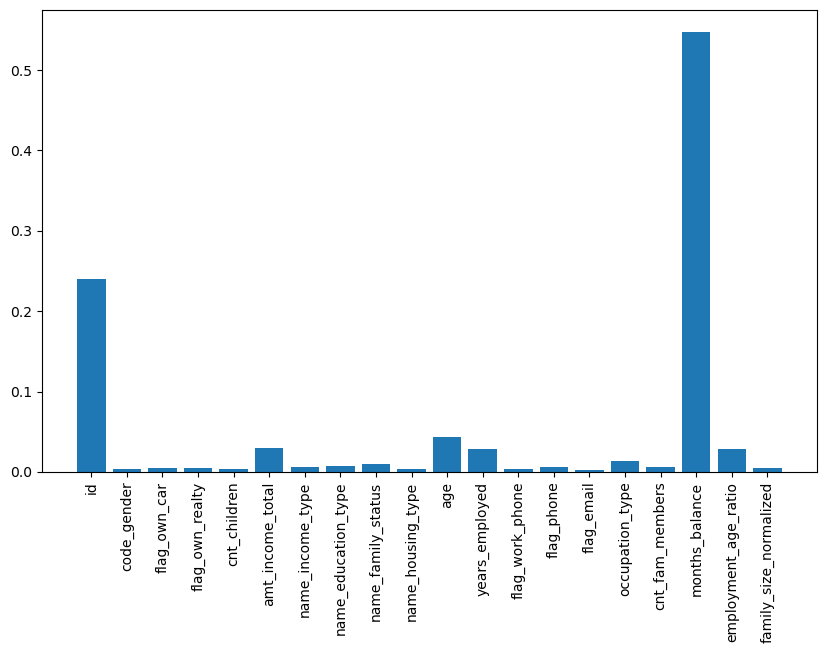

In [ ]:
plotfeatureimportance(rf, X_train)

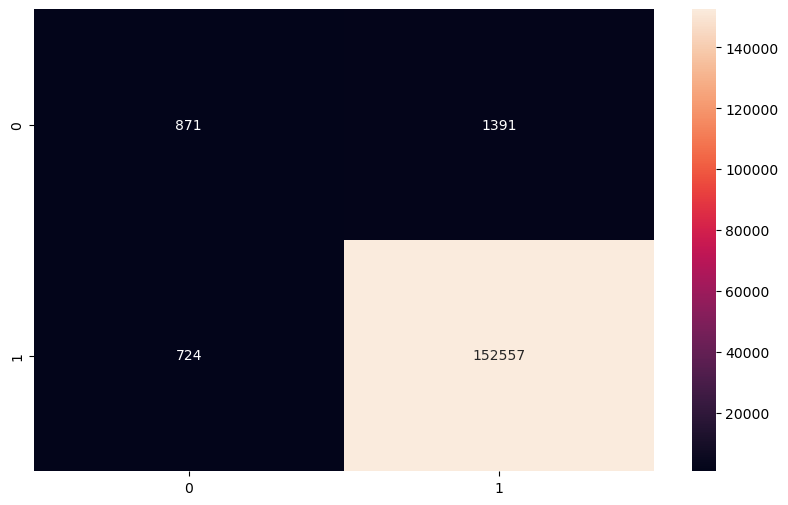

array([[   871,   1391],
       [   724, 152557]])

In [ ]:
confusionmatrix(y_test, y_pred)

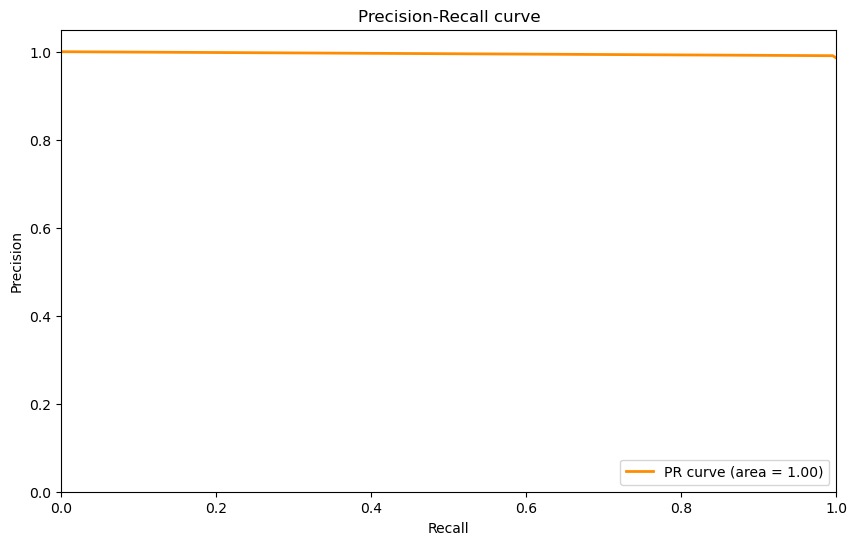

In [ ]:
plotpr(y_test, y_pred)

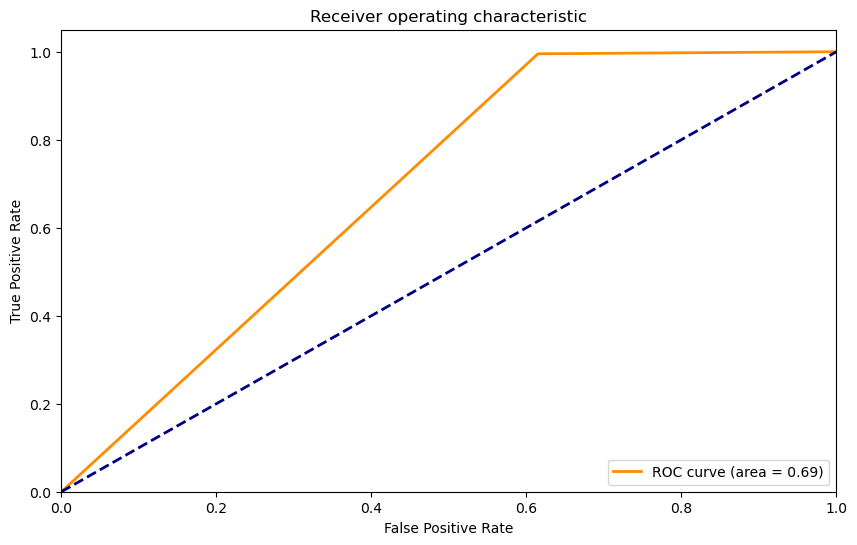

In [ ]:
plotroc(y_test, y_pred)